In [1]:
#Importing library functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

In [2]:
#Loading the dataset
X, y = load_iris(return_X_y=True, as_frame=True)
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [3]:
X.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [4]:
y.describe

<bound method NDFrame.describe of 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32>

In [5]:
print("Range of input features : ")
[print(f"{column} : ({X[column].min()}, {X[column].max()})") for column in X.columns]

Range of input features : 
sepal length (cm) : (4.3, 7.9)
sepal width (cm) : (2.0, 4.4)
petal length (cm) : (1.0, 6.9)
petal width (cm) : (0.1, 2.5)


[None, None, None, None]

In [6]:
#No need of feature scaling as the values are not too far apart
#Train-Test-Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [7]:
print(y_test.value_counts())

target
0    10
1    10
2    10
Name: count, dtype: int64


In [8]:
model = DecisionTreeClassifier(max_depth=4random_state=101)
param_grid = {'criterion' : ['gini', 'entropy', 'log_loss']}

In [9]:
grid = GridSearchCV(model,
                    param_grid=param_grid,
                    scoring='accuracy',
                    return_train_score=True,
                    cv=4,
                    n_jobs=-1,
                    verbose=1
                   )
grid.fit(X_train, y_train)
pd.DataFrame(grid.cv_results_)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.005495,0.000384,0.004373,0.000892,gini,{'criterion': 'gini'},0.966667,0.9,0.900000,0.933333,0.925000,0.027639,3,1.0,1.0,1.0,1.0,1.0,0.0
1,0.003086,0.002207,0.002213,0.002713,entropy,{'criterion': 'entropy'},0.966667,0.9,0.933333,0.933333,0.933333,0.023570,1,1.0,1.0,1.0,1.0,1.0,0.0
2,0.003899,0.001051,0.003003,0.000945,log_loss,{'criterion': 'log_loss'},0.966667,0.9,0.933333,0.933333,0.933333,0.023570,1,1.0,1.0,1.0,1.0,1.0,0.0


In [10]:
y_pred=grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



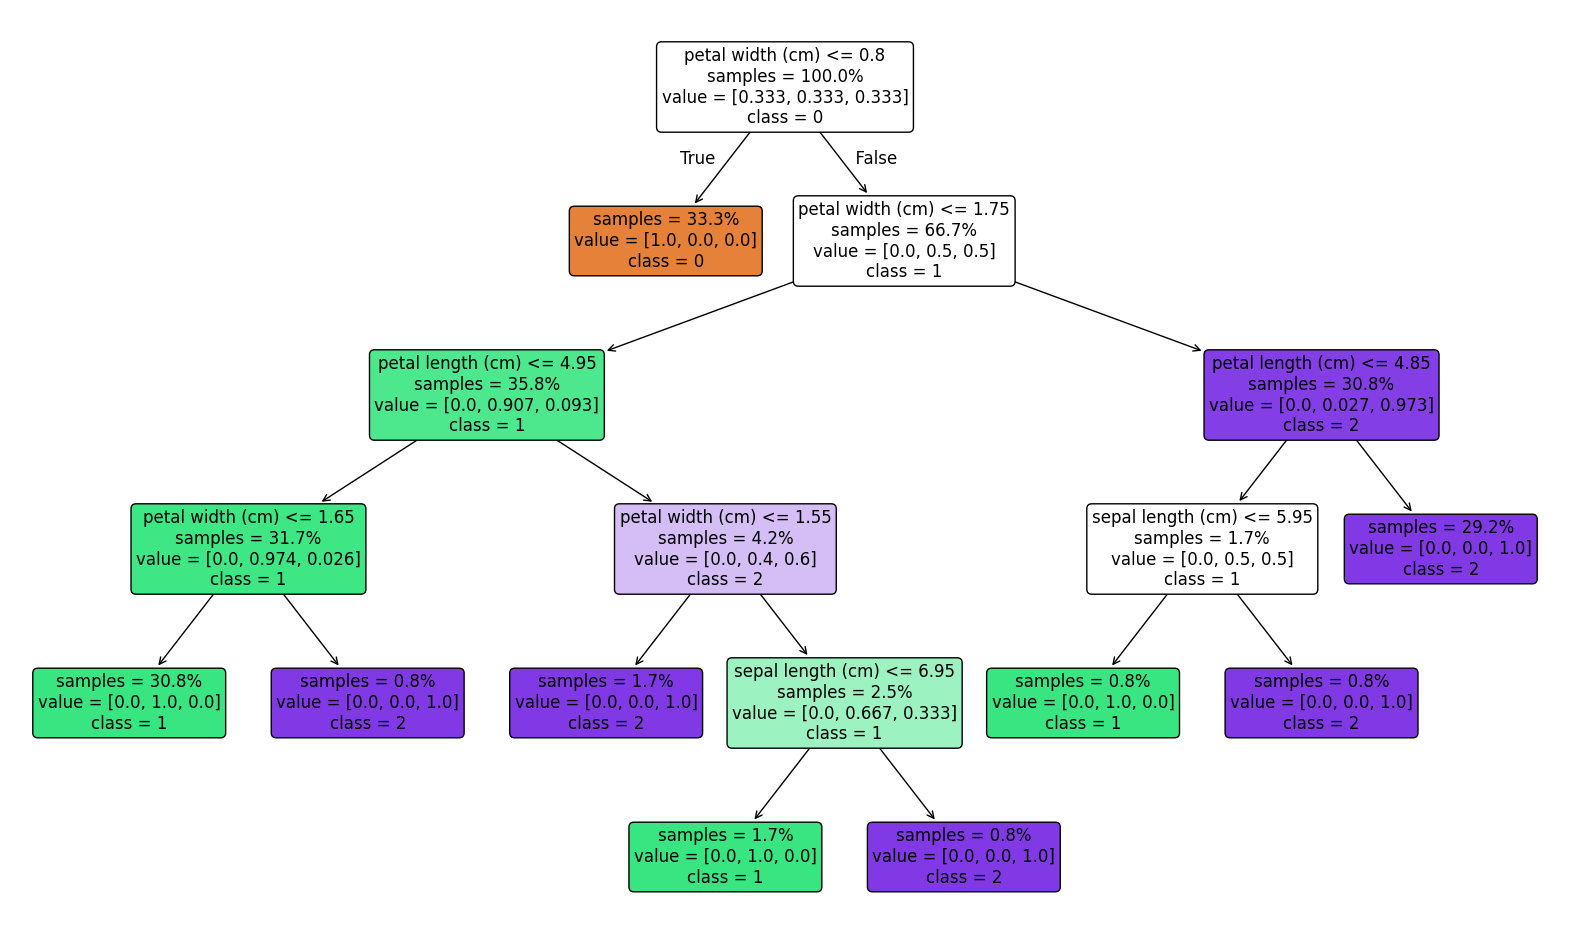

In [11]:
# 1. Let GridSearchCV refit on all of X,y for you:
tree_viz_model = grid.best_estimator_
# 2. Now plot that directly:
plt.figure(figsize=(20,12))
plot_tree(
  tree_viz_model,
  feature_names=X.columns,
  class_names=[str(c) for c in tree_viz_model.classes_],
  filled=True, rounded=True, impurity=False, proportion=True, fontsize=12
)
plt.savefig("best_tree.png", dpi=300, bbox_inches="tight")
plt.show()